In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#phạm Minh Tuấn
import pandas as pd
import os
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [4]:
# Đọc dữ liệu từ tệp CSV vào DataFrame
df1 = pd.read_csv('/content/drive/MyDrive/1.benign.csv')
df2 = pd.read_csv('/content/drive/MyDrive/benign_traffic.csv')

In [5]:
df1

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000,1.000000,...,3.409505e+01,0.000000e+00,0.0,5.319895,344.262695,4.710446,344.262695,2.218830e+01,0.000000e+00,0.000000e+00
2,1.857879,360.458980,3.578934e+01,1.912127,360.275733,3.592397e+01,1.969807,360.091968,35.991542,1.996939,...,1.000815e+02,0.000000e+00,0.0,6.318264,347.703087,9.034660,347.703087,8.162508e+01,0.000000e+00,0.000000e+00
3,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,337.000000,0.000000,337.000000,0.000000e+00,0.000000e+00,0.000000e+00
4,1.680223,172.140917,1.848745e+04,1.793580,182.560279,1.892818e+04,1.925828,193.165753,19153.795810,1.992323,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49543,1.000000,102.000000,0.000000e+00,1.000000,102.000000,1.820000e-12,1.000009,101.999633,0.015405,2.270210,...,3.640000e-12,-1.570000e-30,0.0,4.218824,102.000000,0.000000,144.249783,1.820000e-12,5.970000e-23,0.000000e+00
49544,1.999976,102.000000,0.000000e+00,1.999986,102.000000,1.820000e-12,2.000004,101.999816,0.007702,3.270209,...,3.640000e-12,-1.580000e-44,0.0,4.218838,102.000000,0.000000,144.249783,3.640000e-12,-1.100000e-29,0.000000e+00
49545,2.999872,102.000000,3.640000e-12,2.999923,102.000000,1.820000e-12,2.999983,101.999878,0.005135,4.270206,...,0.000000e+00,-8.330000e-45,0.0,4.179949,102.000000,0.000002,144.249783,5.140000e-12,8.230000e-29,2.260000e-17
49546,3.999664,102.000000,3.640000e-12,3.999798,102.000000,0.000000e+00,3.999942,101.999908,0.003851,5.270200,...,3.640000e-12,4.980000e-69,0.0,4.219537,102.000000,0.000001,144.249783,1.820000e-12,5.960000e-29,0.000000e+00


In [6]:
df2


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.061357,60.000000,9.540000e-07,60.000000,9.090000e-13,0.000000e+00,0.000000e+00
2,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
3,1.000000,590.000000,0.000000,1.000000,590.000000,0.000000e+00,1.000000,590.000000,0.000000,1.000000,...,9.591400e+03,0.000000e+00,0.000000e+00,5.832783,388.850426,9.199164e+01,388.850426,8.462461e+03,0.000000e+00,0.000000e+00
4,1.927179,590.000000,0.000000,1.955648,590.000000,0.000000e+00,1.984992,590.000000,0.000000,1.998489,...,6.354394e+03,0.000000e+00,0.000000e+00,6.831901,418.293119,1.108120e+02,418.293119,1.227931e+04,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,1.000000,60.000016,0.004220,1.000060,60.016192,4.371654e+00,1.062136,75.795270,4015.232277,2.937269,...,1.290000e-12,1.720000e-29,1.890000e-17,6.280762,60.000000,6.740000e-07,84.852814,1.020000e-12,-2.930000e-29,-4.560000e-17
19524,1.000000,330.000000,0.000000,1.000000,330.000000,0.000000e+00,1.000001,329.999756,0.065771,1.730254,...,2.910000e-11,7.390000e-83,0.000000e+00,6.270822,329.984161,2.067902e+00,431.469163,5.167650e+00,4.255310e-04,1.208070e-04
19525,1.999910,330.000000,0.000000,1.999946,330.000000,2.910000e-11,1.999983,329.999878,0.032885,2.730251,...,4.370000e-11,1.560000e-81,0.000000e+00,6.270852,329.984161,2.067902e+00,431.469166,5.167112e+00,4.249440e-04,1.206600e-04
19526,1.000000,60.000005,0.001228,1.000029,60.007722,2.084945e+00,1.048546,72.500491,3218.870260,2.882414,...,4.550000e-13,8.910000e-30,0.000000e+00,6.265220,60.000000,6.740000e-07,84.852814,1.020000e-12,-4.290000e-29,-6.680000e-17


In [7]:
df = pd.concat([df1, df2], ignore_index=True)

In [8]:
df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000,1.000000,...,3.409505e+01,0.000000e+00,0.000000e+00,5.319895,344.262695,4.710446e+00,344.262695,2.218830e+01,0.000000e+00,0.000000e+00
2,1.857879,360.458980,35.789338,1.912127,360.275733,3.592397e+01,1.969807,360.091968,35.991542,1.996939,...,1.000815e+02,0.000000e+00,0.000000e+00,6.318264,347.703087,9.034660e+00,347.703087,8.162508e+01,0.000000e+00,0.000000e+00
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,337.000000,0.000000e+00,337.000000,0.000000e+00,0.000000e+00,0.000000e+00
4,1.680223,172.140917,18487.448750,1.793580,182.560279,1.892818e+04,1.925828,193.165753,19153.795810,1.992323,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69071,1.000000,60.000016,0.004220,1.000060,60.016192,4.371654e+00,1.062136,75.795270,4015.232277,2.937269,...,1.290000e-12,1.720000e-29,1.890000e-17,6.280762,60.000000,6.740000e-07,84.852814,1.020000e-12,-2.930000e-29,-4.560000e-17
69072,1.000000,330.000000,0.000000,1.000000,330.000000,0.000000e+00,1.000001,329.999756,0.065771,1.730254,...,2.910000e-11,7.390000e-83,0.000000e+00,6.270822,329.984161,2.067902e+00,431.469163,5.167650e+00,4.255310e-04,1.208070e-04
69073,1.999910,330.000000,0.000000,1.999946,330.000000,2.910000e-11,1.999983,329.999878,0.032885,2.730251,...,4.370000e-11,1.560000e-81,0.000000e+00,6.270852,329.984161,2.067902e+00,431.469166,5.167112e+00,4.249440e-04,1.206600e-04
69074,1.000000,60.000005,0.001228,1.000029,60.007722,2.084945e+00,1.048546,72.500491,3218.870260,2.882414,...,4.550000e-13,8.910000e-30,0.000000e+00,6.265220,60.000000,6.740000e-07,84.852814,1.020000e-12,-4.290000e-29,-6.680000e-17


In [9]:
columns_list = df.columns.tolist()
print(columns_list)

['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance', 'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance', 'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance', 'MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance', 'MI_dir_L0.01_weight', 'MI_dir_L0.01_mean', 'MI_dir_L0.01_variance', 'H_L5_weight', 'H_L5_mean', 'H_L5_variance', 'H_L3_weight', 'H_L3_mean', 'H_L3_variance', 'H_L1_weight', 'H_L1_mean', 'H_L1_variance', 'H_L0.1_weight', 'H_L0.1_mean', 'H_L0.1_variance', 'H_L0.01_weight', 'H_L0.01_mean', 'H_L0.01_variance', 'HH_L5_weight', 'HH_L5_mean', 'HH_L5_std', 'HH_L5_magnitude', 'HH_L5_radius', 'HH_L5_covariance', 'HH_L5_pcc', 'HH_L3_weight', 'HH_L3_mean', 'HH_L3_std', 'HH_L3_magnitude', 'HH_L3_radius', 'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_weight', 'HH_L1_mean', 'HH_L1_std', 'HH_L1_magnitude', 'HH_L1_radius', 'HH_L1_covariance', 'HH_L1_pcc', 'HH_L0.1_weight', 'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_magnitude', 'HH_L0.1_radius', 'HH_L0.1_covariance', '

In [10]:
df.isna().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_std           0
HpHp_L0.01_magnitude     0
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
Length: 115, dtype: int64

In [11]:
df.duplicated().sum()

10745

In [12]:
#Hiển thị thông tin về DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69076 entries, 0 to 69075
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 60.6 MB


In [13]:

# Xác định điều kiện phân loại (ví dụ: sử dụng cột 'HH_L5_covariance' làm tiêu chuẩn)
threshold = 0.5  # Ngưỡng để xác định dữ liệu là tấn công

# Tạo cột mục tiêu
df['target'] = (df['HH_L5_covariance'] > threshold).astype(int)



In [14]:
target_count = df['target'].nunique()
target_count

2

In [15]:
# Sử dụng phương thức unique() để lấy danh sách các giá trị duy nhất trong cột target
unique_values = df['target'].unique()

# In ra các giá trị duy nhất trong cột target
print("Các giá trị duy nhất trong cột target:", unique_values)

Các giá trị duy nhất trong cột target: [0 1]


In [16]:
df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,5.319895,344.262695,4.710446e+00,344.262695,2.218830e+01,0.000000e+00,0.000000e+00,0
2,1.857879,360.458980,35.789338,1.912127,360.275733,3.592397e+01,1.969807,360.091968,35.991542,1.996939,...,0.000000e+00,0.000000e+00,6.318264,347.703087,9.034660e+00,347.703087,8.162508e+01,0.000000e+00,0.000000e+00,0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,1.000000,337.000000,0.000000e+00,337.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,1.892818e+04,1.925828,193.165753,19153.795810,1.992323,...,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69071,1.000000,60.000016,0.004220,1.000060,60.016192,4.371654e+00,1.062136,75.795270,4015.232277,2.937269,...,1.720000e-29,1.890000e-17,6.280762,60.000000,6.740000e-07,84.852814,1.020000e-12,-2.930000e-29,-4.560000e-17,0
69072,1.000000,330.000000,0.000000,1.000000,330.000000,0.000000e+00,1.000001,329.999756,0.065771,1.730254,...,7.390000e-83,0.000000e+00,6.270822,329.984161,2.067902e+00,431.469163,5.167650e+00,4.255310e-04,1.208070e-04,0
69073,1.999910,330.000000,0.000000,1.999946,330.000000,2.910000e-11,1.999983,329.999878,0.032885,2.730251,...,1.560000e-81,0.000000e+00,6.270852,329.984161,2.067902e+00,431.469166,5.167112e+00,4.249440e-04,1.206600e-04,0
69074,1.000000,60.000005,0.001228,1.000029,60.007722,2.084945e+00,1.048546,72.500491,3218.870260,2.882414,...,8.910000e-30,0.000000e+00,6.265220,60.000000,6.740000e-07,84.852814,1.020000e-12,-4.290000e-29,-6.680000e-17,0


In [17]:
# Với 80%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Giả sử df là DataFrame của bạn

# Chọn các trường dữ liệu 'MI_dir_L5_mean', 'MI_dir_L3_mean', 'MI_dir_L1_mean'
features = df.columns.tolist()
features.remove('target')
selected_features = features

# Chia dữ liệu thành features và labels
X = df[selected_features].values
y = df['target'].values  # Giả sử 'target_column' là cột mục tiêu bạn muốn dự đoán

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





In [18]:
# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
1727/1727 [==============================] - 5s 2ms/step - loss: 0.0104 - accuracy: 0.9982 - val_loss: 0.0015 - val_accuracy: 0.9993
Epoch 2/10
1727/1727 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0011 - val_accuracy: 0.9996
Epoch 3/10
1727/1727 [==============================] - 3s 2ms/step - loss: 9.1871e-04 - accuracy: 0.9997 - val_loss: 6.4853e-04 - val_accuracy: 0.9999
Epoch 4/10
1727/1727 [==============================] - 2s 1ms/step - loss: 6.7643e-04 - accuracy: 0.9998 - val_loss: 3.4875e-04 - val_accuracy: 0.9999
Epoch 5/10
1727/1727 [==============================] - 3s 2ms/step - loss: 5.7229e-04 - accuracy: 0.9998 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 6/10
1727/1727 [==============================] - 3s 2ms/step - loss: 6.2588e-04 - accuracy: 0.9998 - val_loss: 3.9624e-04 - val_accuracy: 0.9999
Epoch 7/10
1727/1727 [==============================] - 3s 2ms/step - loss: 3.6730e-04 - accuracy: 0.9999 - 

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dự đoán xác suất của các lớp
y_pred_prob = model.predict(X_test_scaled)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
threshold = 0.5  # Ngưỡng thường được chọn là 0.5
y_pred = (y_pred_prob > threshold).astype(int)

# Tính toán Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tính toán confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Tính toán các chỉ số khác
tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
fdr = fp / (fp + tp)
for_ = fn / (fn + tn)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("FPR:", fpr)
print("FNR:", fnr)
print("FDR:", fdr)
print("FOR:", for_)


432/432 [==============================] - 1s 1ms/step
Accuracy: 1.0
Confusion Matrix:
[[13730     0]
 [    0    86]]
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
FPR: 0.0
FNR: 0.0
FDR: 0.0
FOR: 0.0


In [20]:
#svm
from sklearn.svm import SVC
# Tạo mô hình SVM
svm_model = SVC(kernel='linear')  # Chọn kernel tùy thuộc vào yêu cầu của bài toán

# Huấn luyện mô hình SVM
svm_model.fit(X_train_scaled, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test_scaled)

In [21]:
# Dự đoán nhãn trên tập kiểm tra bằng SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Tính toán Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

# Tính toán confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

# Tính toán các chỉ số khác
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm.ravel()

sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)
precision_svm = tp_svm / (tp_svm + fp_svm)
fpr_svm = fp_svm / (fp_svm + tn_svm)
fnr_svm = fn_svm / (fn_svm + tp_svm)
fdr_svm = fp_svm / (fp_svm + tp_svm)
for_svm = fn_svm / (fn_svm + tn_svm)

print("Sensitivity (SVM):", sensitivity_svm)
print("Specificity (SVM):", specificity_svm)
print("Precision (SVM):", precision_svm)
print("FPR (SVM):", fpr_svm)
print("FNR (SVM):", fnr_svm)
print("FDR (SVM):", fdr_svm)
print("FOR (SVM):", for_svm)


Accuracy (SVM): 0.99992762015055
Confusion Matrix (SVM):
[[13729     1]
 [    0    86]]
Sensitivity (SVM): 1.0
Specificity (SVM): 0.9999271667880554
Precision (SVM): 0.9885057471264368
FPR (SVM): 7.283321194464675e-05
FNR (SVM): 0.0
FDR (SVM): 0.011494252873563218
FOR (SVM): 0.0


In [22]:
# Xây dựng mô hình DNN
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
                   loss='binary_crossentropy',  # Đối với bài toán nhị phân
                   metrics=['accuracy'])

# Đào tạo mô hình
model_dnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/10
1727/1727 [==============================] - 3s 1ms/step - loss: 0.0086 - accuracy: 0.9978 - val_loss: 9.4770e-04 - val_accuracy: 0.9996
Epoch 2/10
1727/1727 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 3/10
1727/1727 [==============================] - 2s 1ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 7.3253e-04 - val_accuracy: 0.9997
Epoch 4/10
1727/1727 [==============================] - 3s 2ms/step - loss: 6.1983e-04 - accuracy: 0.9997 - val_loss: 4.8555e-04 - val_accuracy: 0.9998
Epoch 5/10
1727/1727 [==============================] - 3s 2ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 4.3489e-04 - val_accuracy: 0.9999
Epoch 6/10
1727/1727 [==============================] - 2s 1ms/step - loss: 7.9714e-04 - accuracy: 0.9998 - val_loss: 6.8125e-04 - val_accuracy: 0.9996
Epoch 7/10
1727/1727 [==============================] - 2s 1ms/step - loss: 2.7989e-04 - accuracy: 0.9999 - 

In [23]:
# Dự đoán xác suất của các lớp
y_pred_prob_dnn = model_dnn.predict(X_test_scaled)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_dnn = (y_pred_prob_dnn > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn = accuracy_score(y_test, y_pred_dnn)
print("Accuracy (DNN):", accuracy_dnn)

# Tính toán confusion matrix
conf_matrix_dnn = confusion_matrix(y_test, y_pred_dnn)
print("Confusion Matrix (DNN):")
print(conf_matrix_dnn)

# Tính toán các chỉ số khác
tn_dnn, fp_dnn, fn_dnn, tp_dnn = conf_matrix_dnn.ravel()

sensitivity_dnn = tp_dnn / (tp_dnn + fn_dnn)
specificity_dnn = tn_dnn / (tn_dnn + fp_dnn)
precision_dnn = tp_dnn / (tp_dnn + fp_dnn)
fpr_dnn = fp_dnn / (fp_dnn + tn_dnn)
fnr_dnn = fn_dnn / (fn_dnn + tp_dnn)
fdr_dnn = fp_dnn / (fp_dnn + tp_dnn)
for_dnn = fn_dnn / (fn_dnn + tn_dnn)

print("Sensitivity (DNN):", sensitivity_dnn)
print("Specificity (DNN):", specificity_dnn)
print("Precision (DNN):", precision_dnn)
print("FPR (DNN):", fpr_dnn)
print("FNR (DNN):", fnr_dnn)
print("FDR (DNN):", fdr_dnn)
print("FOR (DNN):", for_dnn)


432/432 [==============================] - 1s 1ms/step
Accuracy (DNN): 0.9997104806022004
Confusion Matrix (DNN):
[[13728     2]
 [    2    84]]
Sensitivity (DNN): 0.9767441860465116
Specificity (DNN): 0.9998543335761108
Precision (DNN): 0.9767441860465116
FPR (DNN): 0.0001456664238892935
FNR (DNN): 0.023255813953488372
FDR (DNN): 0.023255813953488372
FOR (DNN): 0.0001456664238892935


In [24]:
# Xây dựng mô hình neural network
model_nn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model_nn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/10
1727/1727 [==============================] - 3s 2ms/step - loss: 0.0080 - accuracy: 0.9981 - val_loss: 0.0014 - val_accuracy: 0.9996
Epoch 2/10
1727/1727 [==============================] - 3s 2ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 7.6841e-04 - val_accuracy: 0.9997
Epoch 3/10
1727/1727 [==============================] - 6s 4ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 3.5250e-04 - val_accuracy: 0.9999
Epoch 4/10
1727/1727 [==============================] - 2s 1ms/step - loss: 5.5113e-04 - accuracy: 0.9998 - val_loss: 6.8625e-04 - val_accuracy: 0.9998
Epoch 5/10
1727/1727 [==============================] - 2s 1ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 2.7220e-04 - val_accuracy: 0.9999
Epoch 6/10
1727/1727 [==============================] - 3s 2ms/step - loss: 4.7804e-04 - accuracy: 0.9998 - val_loss: 7.0585e-04 - val_accuracy: 0.9997
Epoch 7/10
1727/1727 [==============================] - 2s 1ms/step - loss: 3.7186e-04 - accuracy: 0.9999 - 

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Dự đoán xác suất của các lớp
y_pred_prob_nn = model_nn.predict(X_test_scaled)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_nn = (y_pred_prob_nn > threshold).astype(int)

# Tính toán Accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy (NN):", accuracy_nn)

# Tính toán confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix (NN):")
print(conf_matrix_nn)

# Tính toán các chỉ số khác
tn_nn, fp_nn, fn_nn, tp_nn = conf_matrix_nn.ravel()

sensitivity_nn = tp_nn / (tp_nn + fn_nn)
specificity_nn = tn_nn / (tn_nn + fp_nn)
precision_nn = tp_nn / (tp_nn + fp_nn)
fpr_nn = fp_nn / (fp_nn + tn_nn)
fnr_nn = fn_nn / (fn_nn + tp_nn)
fdr_nn = fp_nn / (fp_nn + tp_nn)
for_nn = fn_nn / (fn_nn + tn_nn)

print("Sensitivity (NN):", sensitivity_nn)
print("Specificity (NN):", specificity_nn)
print("Precision (NN):", precision_nn)
print("FPR (NN):", fpr_nn)
print("FNR (NN):", fnr_nn)
print("FDR (NN):", fdr_nn)
print("FOR (NN):", for_nn)


432/432 [==============================] - 1s 1ms/step
Accuracy (NN): 0.99992762015055
Confusion Matrix (NN):
[[13729     1]
 [    0    86]]
Sensitivity (NN): 1.0
Specificity (NN): 0.9999271667880554
Precision (NN): 0.9885057471264368
FPR (NN): 7.283321194464675e-05
FNR (NN): 0.0
FDR (NN): 0.011494252873563218
FOR (NN): 0.0


In [26]:
# Áp dụng MFSLnO để chọn ra các đặc trưng quan trọng
# Ví dụ: sử dụng phương pháp phân tích phương sai
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.2)  # Chọn ra các đặc trưng có phương sai lớn hơn ngưỡng 0.2
X_train_selected = selector.fit_transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Xây dựng mạng nơ-ron sâu (DNN) với các đặc trưng đã được chọn
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_selected.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình DNN
model_dnn.fit(X_train_selected, y_train, epochs=10, batch_size=32, validation_data=(X_test_selected, y_test))


Epoch 1/10
1727/1727 [==============================] - 3s 1ms/step - loss: 0.0070 - accuracy: 0.9990 - val_loss: 9.4840e-04 - val_accuracy: 0.9997
Epoch 2/10
1727/1727 [==============================] - 2s 1ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0011 - val_accuracy: 0.9998
Epoch 3/10
1727/1727 [==============================] - 2s 1ms/step - loss: 9.7092e-04 - accuracy: 0.9995 - val_loss: 6.3709e-04 - val_accuracy: 0.9999
Epoch 4/10
1727/1727 [==============================] - 3s 1ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 4.9987e-04 - val_accuracy: 0.9999
Epoch 5/10
1727/1727 [==============================] - 3s 2ms/step - loss: 4.6042e-04 - accuracy: 0.9998 - val_loss: 2.6931e-04 - val_accuracy: 0.9999
Epoch 6/10
1727/1727 [==============================] - 3s 2ms/step - loss: 4.9069e-04 - accuracy: 0.9998 - val_loss: 4.0824e-04 - val_accuracy: 0.9999
Epoch 7/10
1727/1727 [==============================] - 3s 2ms/step - loss: 3.7677e-04 - accuracy: 0.999

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Dự đoán nhãn cho tập kiểm tra bằng mô hình DNN với các đặc trưng đã được chọn
y_pred_dnn_MFSLnO = model_dnn.predict(X_test_selected)
y_pred_dnn_MFSLnO = (y_pred_dnn_MFSLnO > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_MFSLnO = accuracy_score(y_test, y_pred_dnn_MFSLnO)
print("Accuracy (DNN with selected features):", accuracy_dnn_MFSLnO)

# Tính toán confusion matrix
conf_matrix_dnn_MFSLnO = confusion_matrix(y_test, y_pred_dnn_MFSLnO)
print("Confusion Matrix (DNN with selected features):")
print(conf_matrix_dnn_MFSLnO)

# Tính toán các chỉ số khác
tn_dnn_MFSLnO, fp_dnn_MFSLnO, fn_dnn_MFSLnO, tp_dnn_MFSLnO = conf_matrix_dnn_MFSLnO.ravel()

sensitivity_dnn_MFSLnO = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fn_dnn_MFSLnO)
specificity_dnn_MFSLnO = tn_dnn_MFSLnO / (tn_dnn_MFSLnO + fp_dnn_MFSLnO)
precision_dnn_MFSLnO = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fp_dnn_MFSLnO)
fpr_dnn_MFSLnO = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tn_dnn_MFSLnO)
fnr_dnn_MFSLnO = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tp_dnn_MFSLnO)
fdr_dnn_MFSLnO = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tp_dnn_MFSLnO)
for_dnn_MFSLnO = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tn_dnn_MFSLnO)

print("Sensitivity (DNN with selected features):", sensitivity_dnn_MFSLnO)
print("Specificity (DNN with selected features):", specificity_dnn_MFSLnO)
print("Precision (DNN with selected features):", precision_dnn_MFSLnO)
print("FPR (DNN with selected features):", fpr_dnn_MFSLnO)
print("FNR (DNN with selected features):", fnr_dnn_MFSLnO)
print("FDR (DNN with selected features):", fdr_dnn_MFSLnO)
print("FOR (DNN with selected features):", for_dnn_MFSLnO)


432/432 [==============================] - 0s 812us/step
Accuracy (DNN with selected features): 0.99992762015055
Confusion Matrix (DNN with selected features):
[[13729     1]
 [    0    86]]
Sensitivity (DNN with selected features): 1.0
Specificity (DNN with selected features): 0.9999271667880554
Precision (DNN with selected features): 0.9885057471264368
FPR (DNN with selected features): 7.283321194464675e-05
FNR (DNN with selected features): 0.0
FDR (DNN with selected features): 0.011494252873563218
FOR (DNN with selected features): 0.0


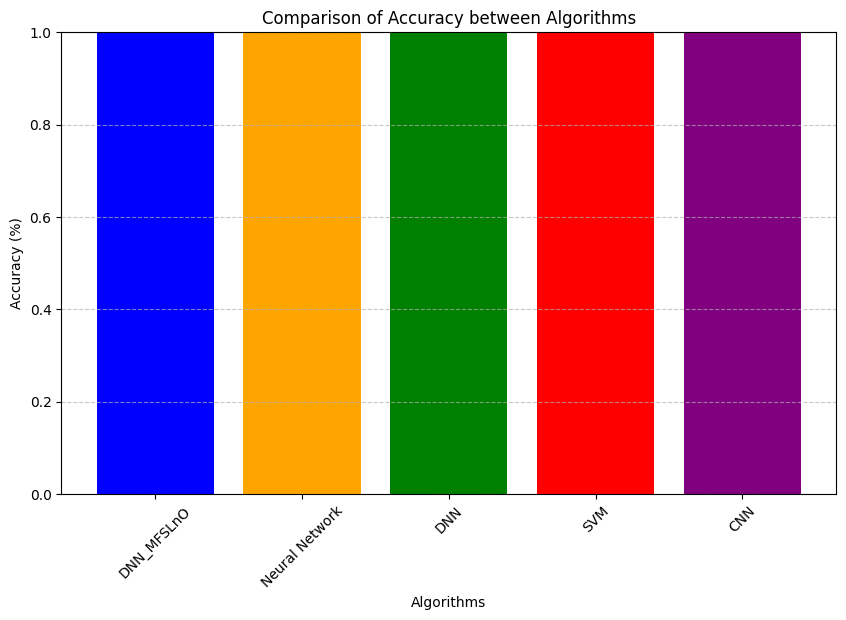

In [28]:
import matplotlib.pyplot as plt

# Chuyển đổi độ chính xác sang phần trăm
# accuracy_dnn_MFSLnO_percent = accuracy_dnn_MFSLnO * 100
# accuracy_nn_percent = accuracy_nn * 100
# accuracy_dnn_percent = accuracy_dnn * 100
# accuracy_svm_percent = accuracy_svm * 100
# accuracy_percent = accuracy * 100

# Độ chính xác của các thuật toán
accuracies = [accuracy_dnn_MFSLnO, accuracy_nn, accuracy_dnn, accuracy_svm, accuracy]
algorithms = ['DNN_MFSLnO', 'Neural Network', 'DNN', 'SVM', 'CNN']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy between Algorithms')
plt.ylim(0, 1)  # Đặt giới hạn cho trục y từ 0 đến 100 để hiển thị phần trăm
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Hiển


In [29]:
#70%
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)


In [30]:
# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model.fit(X_train_scaled_1, y_train_1, epochs=10, batch_size=32, validation_data=(X_test_scaled_1, y_test_1))

Epoch 1/10
1512/1512 [==============================] - 3s 2ms/step - loss: 0.0072 - accuracy: 0.9986 - val_loss: 0.0011 - val_accuracy: 0.9995
Epoch 2/10
1512/1512 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 3.9926e-04 - val_accuracy: 0.9999
Epoch 3/10
1512/1512 [==============================] - 3s 2ms/step - loss: 7.7202e-04 - accuracy: 0.9998 - val_loss: 0.0013 - val_accuracy: 0.9997
Epoch 4/10
1512/1512 [==============================] - 2s 2ms/step - loss: 7.4372e-04 - accuracy: 0.9998 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 5/10
1512/1512 [==============================] - 2s 2ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 3.7518e-04 - val_accuracy: 0.9998
Epoch 6/10
1512/1512 [==============================] - 2s 2ms/step - loss: 3.1326e-04 - accuracy: 0.9999 - val_loss: 4.4164e-04 - val_accuracy: 0.9999
Epoch 7/10
1512/1512 [==============================] - 3s 2ms/step - loss: 2.9438e-04 - accuracy: 0.9999 - val_

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dự đoán xác suất của các lớp
y_pred_prob = model.predict(X_test_scaled_1)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
threshold = 0.5  # Ngưỡng thường được chọn là 0.5
y_pred_1 = (y_pred_prob > threshold).astype(int)

# Tính toán Accuracy
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
print("Accuracy:", accuracy_1)

# Tính toán confusion matrix
conf_matrix_1 = confusion_matrix(y_test_1, y_pred_1)
print("Confusion Matrix:")
print(conf_matrix_1)

# Tính toán các chỉ số khác
tn, fp, fn, tp = conf_matrix_1.ravel()

sensitivity_1 = tp / (tp + fn)
specificity_1 = tn / (tn + fp)
precision_1 = tp / (tp + fp)
fpr_1 = fp / (fp + tn)
fnr_1 = fn / (fn + tp)
fdr_1 = fp / (fp + tp)
for_1 = fn / (fn + tn)

print("Sensitivity:", sensitivity_1)
print("Specificity:", specificity_1)
print("Precision:", precision_1)
print("FPR:", fpr_1)
print("FNR:", fnr_1)
print("FDR:", fdr_1)
print("FOR:", for_1)


648/648 [==============================] - 1s 816us/step
Accuracy: 1.0
Confusion Matrix:
[[20604     0]
 [    0   119]]
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
FPR: 0.0
FNR: 0.0
FDR: 0.0
FOR: 0.0


In [32]:

# Tạo mô hình SVM
svm_model = SVC(kernel='linear')  # Chọn kernel tùy thuộc vào yêu cầu của bài toán

# Huấn luyện mô hình SVM
svm_model.fit(X_train_scaled_1, y_train_1)

# Dự đoán nhãn trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test_scaled_1)

In [33]:
# Dự đoán nhãn trên tập kiểm tra bằng SVM
y_pred_svm= svm_model.predict(X_test_scaled_1)

# Tính toán Accuracy
accuracy_svm_1 = accuracy_score(y_test_1, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm_1)

# Tính toán confusion matrix
conf_matrix_svm_1 = confusion_matrix(y_test_1, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm_1)

# Tính toán các chỉ số khác
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm_1.ravel()

sensitivity_svm_1 = tp_svm / (tp_svm + fn_svm)
specificity_svm_1 = tn_svm / (tn_svm + fp_svm)
precision_svm_1 = tp_svm / (tp_svm + fp_svm)
fpr_svm_1 = fp_svm / (fp_svm + tn_svm)
fnr_svm_1 = fn_svm / (fn_svm + tp_svm)
fdr_svm_1 = fp_svm / (fp_svm + tp_svm)
for_svm_1 = fn_svm / (fn_svm + tn_svm)

print("Sensitivity (SVM):", sensitivity_svm_1)
print("Specificity (SVM):", specificity_svm_1)
print("Precision (SVM):", precision_svm_1)
print("FPR (SVM):", fpr_svm_1)
print("FNR (SVM):", fnr_svm_1)
print("FDR (SVM):", fdr_svm_1)
print("FOR (SVM):", for_svm_1)


Accuracy (SVM): 0.9998552333156396
Confusion Matrix (SVM):
[[20601     3]
 [    0   119]]
Sensitivity (SVM): 1.0
Specificity (SVM): 0.9998543972044264
Precision (SVM): 0.9754098360655737
FPR (SVM): 0.00014560279557367502
FNR (SVM): 0.0
FDR (SVM): 0.02459016393442623
FOR (SVM): 0.0


In [34]:
# Xây dựng mô hình DNN
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
                   loss='binary_crossentropy',  # Đối với bài toán nhị phân
                   metrics=['accuracy'])

# Đào tạo mô hình
model_dnn.fit(X_train_scaled_1, y_train_1, epochs=10, batch_size=32, validation_data=(X_test_scaled_1, y_test_1))

Epoch 1/10
1512/1512 [==============================] - 4s 2ms/step - loss: 0.0070 - accuracy: 0.9989 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 2/10
1512/1512 [==============================] - 2s 1ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0038 - val_accuracy: 0.9983
Epoch 3/10
1512/1512 [==============================] - 2s 1ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 8.6788e-04 - val_accuracy: 0.9997
Epoch 4/10
1512/1512 [==============================] - 2s 1ms/step - loss: 8.1796e-04 - accuracy: 0.9997 - val_loss: 2.6234e-04 - val_accuracy: 0.9999
Epoch 5/10
1512/1512 [==============================] - 2s 1ms/step - loss: 5.0088e-04 - accuracy: 0.9998 - val_loss: 3.3068e-04 - val_accuracy: 0.9997
Epoch 6/10
1512/1512 [==============================] - 3s 2ms/step - loss: 4.9699e-04 - accuracy: 0.9999 - val_loss: 1.9164e-04 - val_accuracy: 1.0000
Epoch 7/10
1512/1512 [==============================] - 2s 2ms/step - loss: 6.0629e-04 - accuracy: 0.9998 - 

In [35]:
# Dự đoán xác suất của các lớp
y_pred_prob_dnn = model_dnn.predict(X_test_scaled_1)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_dnn = (y_pred_prob_dnn > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_1 = accuracy_score(y_test_1, y_pred_dnn)
print("Accuracy (DNN):", accuracy_dnn_1)

# Tính toán confusion matrix
conf_matrix_dnn = confusion_matrix(y_test_1, y_pred_dnn)
print("Confusion Matrix (DNN):")
print(conf_matrix_dnn)

# Tính toán các chỉ số khác
tn_dnn, fp_dnn, fn_dnn, tp_dnn = conf_matrix_dnn.ravel()

sensitivity_dnn_1 = tp_dnn / (tp_dnn + fn_dnn)
specificity_dnn_1 = tn_dnn / (tn_dnn + fp_dnn)
precision_dnn_1 = tp_dnn / (tp_dnn + fp_dnn)
fpr_dnn_1 = fp_dnn / (fp_dnn + tn_dnn)
fnr_dnn_1 = fn_dnn / (fn_dnn + tp_dnn)
fdr_dnn_1 = fp_dnn / (fp_dnn + tp_dnn)
for_dnn_1 = fn_dnn / (fn_dnn + tn_dnn)

print("Sensitivity (DNN):", sensitivity_dnn_1)
print("Specificity (DNN):", specificity_dnn_1)
print("Precision (DNN):", precision_dnn_1)
print("FPR (DNN):", fpr_dnn_1)
print("FNR (DNN):", fnr_dnn_1)
print("FDR (DNN):", fdr_dnn_1)
print("FOR (DNN):", for_dnn_1)


648/648 [==============================] - 1s 806us/step
Accuracy (DNN): 1.0
Confusion Matrix (DNN):
[[20604     0]
 [    0   119]]
Sensitivity (DNN): 1.0
Specificity (DNN): 1.0
Precision (DNN): 1.0
FPR (DNN): 0.0
FNR (DNN): 0.0
FDR (DNN): 0.0
FOR (DNN): 0.0


In [36]:
# Xây dựng mô hình neural network
model_nn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model_nn.fit(X_train_scaled_1, y_train_1, epochs=10, batch_size=32, validation_data=(X_test_scaled_1, y_test_1))

Epoch 1/10
1512/1512 [==============================] - 3s 2ms/step - loss: 0.0106 - accuracy: 0.9982 - val_loss: 0.0014 - val_accuracy: 0.9994
Epoch 2/10
1512/1512 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 7.7662e-04 - val_accuracy: 0.9997
Epoch 3/10
1512/1512 [==============================] - 3s 2ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0013 - val_accuracy: 0.9996
Epoch 4/10
1512/1512 [==============================] - 2s 1ms/step - loss: 9.2957e-04 - accuracy: 0.9997 - val_loss: 4.3784e-04 - val_accuracy: 0.9999
Epoch 5/10
1512/1512 [==============================] - 2s 2ms/step - loss: 6.0605e-04 - accuracy: 0.9997 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 6/10
1512/1512 [==============================] - 2s 2ms/step - loss: 3.2977e-04 - accuracy: 0.9999 - val_loss: 2.9996e-04 - val_accuracy: 0.9999
Epoch 7/10
1512/1512 [==============================] - 2s 2ms/step - loss: 7.6254e-04 - accuracy: 0.9998 - val_

In [37]:
# Dự đoán xác suất của các lớp
y_pred_prob_nn = model_nn.predict(X_test_scaled_1)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_nn = (y_pred_prob_nn > threshold).astype(int)

# Tính toán Accuracy
accuracy_nn_1 = accuracy_score(y_test_1, y_pred_nn)
print("Accuracy (NN):", accuracy_nn_1)

# Tính toán confusion matrix
conf_matrix_nn = confusion_matrix(y_test_1, y_pred_nn)
print("Confusion Matrix (NN):")
print(conf_matrix_nn)

# Tính toán các chỉ số khác
tn_nn, fp_nn, fn_nn, tp_nn = conf_matrix_nn.ravel()

sensitivity_nn_1 = tp_nn / (tp_nn + fn_nn)
specificity_nn_1 = tn_nn / (tn_nn + fp_nn)
precision_nn_1 = tp_nn / (tp_nn + fp_nn)
fpr_nn_1 = fp_nn / (fp_nn + tn_nn)
fnr_nn_1 = fn_nn / (fn_nn + tp_nn)
fdr_nn_1 = fp_nn / (fp_nn + tp_nn)
for_nn_1 = fn_nn / (fn_nn + tn_nn)

print("Sensitivity (NN):", sensitivity_nn_1)
print("Specificity (NN):", specificity_nn_1)
print("Precision (NN):", precision_nn_1)
print("FPR (NN):", fpr_nn_1)
print("FNR (NN):", fnr_nn_1)
print("FDR (NN):", fdr_nn_1)
print("FOR (NN):", for_nn_1)

648/648 [==============================] - 1s 840us/step
Accuracy (NN): 0.9999517444385465
Confusion Matrix (NN):
[[20604     0]
 [    1   118]]
Sensitivity (NN): 0.9915966386554622
Specificity (NN): 1.0
Precision (NN): 1.0
FPR (NN): 0.0
FNR (NN): 0.008403361344537815
FDR (NN): 0.0
FOR (NN): 4.85319097306479e-05


In [38]:
#DNN_MFSLnO

selector = VarianceThreshold(threshold=0.2)  # Chọn ra các đặc trưng có phương sai lớn hơn ngưỡng 0.2
X_train_selected = selector.fit_transform(X_train_scaled_1)
X_test_selected = selector.transform(X_test_scaled_1)

# Xây dựng mạng nơ-ron sâu (DNN) với các đặc trưng đã được chọn
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_selected.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình DNN
model_dnn.fit(X_train_selected, y_train_1, epochs=10, batch_size=32, validation_data=(X_test_selected, y_test_1))


Epoch 1/10
1512/1512 [==============================] - 3s 2ms/step - loss: 0.0075 - accuracy: 0.9988 - val_loss: 0.0019 - val_accuracy: 0.9994
Epoch 2/10
1512/1512 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0010 - val_accuracy: 0.9996
Epoch 3/10
1512/1512 [==============================] - 2s 2ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 6.0597e-04 - val_accuracy: 0.9999
Epoch 4/10
1512/1512 [==============================] - 2s 2ms/step - loss: 8.8490e-04 - accuracy: 0.9996 - val_loss: 4.4572e-04 - val_accuracy: 0.9999
Epoch 5/10
1512/1512 [==============================] - 3s 2ms/step - loss: 6.9086e-04 - accuracy: 0.9998 - val_loss: 2.0784e-04 - val_accuracy: 1.0000
Epoch 6/10
1512/1512 [==============================] - 5s 3ms/step - loss: 6.1708e-04 - accuracy: 0.9997 - val_loss: 2.7023e-04 - val_accuracy: 0.9999
Epoch 7/10
1512/1512 [==============================] - 2s 2ms/step - loss: 4.0158e-04 - accuracy: 0.9998 - 

In [39]:
# Dự đoán nhãn cho tập kiểm tra bằng mô hình DNN với các đặc trưng đã được chọn
y_pred_dnn_MFSLnO = model_dnn.predict(X_test_selected)
y_pred_dnn_MFSLnO = (y_pred_dnn_MFSLnO > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_MFSLnO_1 = accuracy_score(y_test_1, y_pred_dnn_MFSLnO)
print("Accuracy (DNN with selected features):", accuracy_dnn_MFSLnO_1)

# Tính toán confusion matrix
conf_matrix_dnn_MFSLnO = confusion_matrix(y_test_1, y_pred_dnn_MFSLnO)
print("Confusion Matrix (DNN with selected features):")
print(conf_matrix_dnn_MFSLnO)

# Tính toán các chỉ số khác
tn_dnn_MFSLnO, fp_dnn_MFSLnO, fn_dnn_MFSLnO, tp_dnn_MFSLnO = conf_matrix_dnn_MFSLnO.ravel()

sensitivity_dnn_MFSLnO_1 = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fn_dnn_MFSLnO)
specificity_dnn_MFSLnO_1 = tn_dnn_MFSLnO / (tn_dnn_MFSLnO + fp_dnn_MFSLnO)
precision_dnn_MFSLnO_1 = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fp_dnn_MFSLnO)
fpr_dnn_MFSLnO_1 = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tn_dnn_MFSLnO)
fnr_dnn_MFSLnO_1 = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tp_dnn_MFSLnO)
fdr_dnn_MFSLnO_1 = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tp_dnn_MFSLnO)
for_dnn_MFSLnO_1 = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tn_dnn_MFSLnO)

print("Sensitivity (DNN with selected features):", sensitivity_dnn_MFSLnO_1)
print("Specificity (DNN with selected features):", specificity_dnn_MFSLnO_1)
print("Precision (DNN with selected features):", precision_dnn_MFSLnO_1)
print("FPR (DNN with selected features):", fpr_dnn_MFSLnO_1)
print("FNR (DNN with selected features):", fnr_dnn_MFSLnO_1)
print("FDR (DNN with selected features):", fdr_dnn_MFSLnO_1)
print("FOR (DNN with selected features):", for_dnn_MFSLnO_1)

648/648 [==============================] - 1s 812us/step
Accuracy (DNN with selected features): 0.9999517444385465
Confusion Matrix (DNN with selected features):
[[20603     1]
 [    0   119]]
Sensitivity (DNN with selected features): 1.0
Specificity (DNN with selected features): 0.9999514657348088
Precision (DNN with selected features): 0.9916666666666667
FPR (DNN with selected features): 4.8534265191225004e-05
FNR (DNN with selected features): 0.0
FDR (DNN with selected features): 0.008333333333333333
FOR (DNN with selected features): 0.0


In [40]:
#60%
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.4, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)

In [41]:
# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model.fit(X_train_scaled_2, y_train_2, epochs=10, batch_size=32, validation_data=(X_test_scaled_2, y_test_2))

Epoch 1/10
1296/1296 [==============================] - 3s 2ms/step - loss: 0.0121 - accuracy: 0.9971 - val_loss: 0.0018 - val_accuracy: 0.9994
Epoch 2/10
1296/1296 [==============================] - 2s 2ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0014 - val_accuracy: 0.9995
Epoch 3/10
1296/1296 [==============================] - 3s 2ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 7.0734e-04 - val_accuracy: 0.9997
Epoch 4/10
1296/1296 [==============================] - 2s 2ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 4.3483e-04 - val_accuracy: 0.9999
Epoch 5/10
1296/1296 [==============================] - 3s 2ms/step - loss: 4.3003e-04 - accuracy: 0.9999 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 6/10
1296/1296 [==============================] - 2s 2ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 3.0506e-04 - val_accuracy: 0.9999
Epoch 7/10
1296/1296 [==============================] - 2s 2ms/step - loss: 3.9961e-04 - accuracy: 0.9999 - val_loss: 3.

In [42]:
# Dự đoán xác suất của các lớp
y_pred_prob = model.predict(X_test_scaled_2)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
threshold = 0.5  # Ngưỡng thường được chọn là 0.5
y_pred_2 = (y_pred_prob > threshold).astype(int)

# Tính toán Accuracy
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
print("Accuracy:", accuracy_2)

# Tính toán confusion matrix
conf_matrix_2 = confusion_matrix(y_test_2, y_pred_2)
print("Confusion Matrix:")
print(conf_matrix_2)

# Tính toán các chỉ số khác
tn, fp, fn, tp = conf_matrix_2.ravel()

sensitivity_2 = tp / (tp + fn)
specificity_2 = tn / (tn + fp)
precision_2 = tp / (tp + fp)
fpr_2 = fp / (fp + tn)
fnr_2 = fn / (fn + tp)
fdr_2 = fp / (fp + tp)
for_2 = fn / (fn + tn)

print("Sensitivity:", sensitivity_2)
print("Specificity:", specificity_2)
print("Precision:", precision_2)
print("FPR:", fpr_2)
print("FNR:", fnr_2)
print("FDR:", fdr_2)
print("FOR:", for_2)

864/864 [==============================] - 2s 3ms/step
Accuracy: 0.9999638087655169
Confusion Matrix:
[[27459     0]
 [    1   171]]
Sensitivity: 0.9941860465116279
Specificity: 1.0
Precision: 1.0
FPR: 0.0
FNR: 0.005813953488372093
FDR: 0.0
FOR: 3.641660597232338e-05


In [43]:
# Tạo mô hình SVM
svm_model = SVC(kernel='linear')  # Chọn kernel tùy thuộc vào yêu cầu của bài toán

# Huấn luyện mô hình SVM
svm_model.fit(X_train_scaled_2, y_train_2)

# Dự đoán nhãn trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test_scaled_2)

In [44]:
# Dự đoán nhãn trên tập kiểm tra bằng SVM
y_pred_svm= svm_model.predict(X_test_scaled_2)

# Tính toán Accuracy
accuracy_svm_2 = accuracy_score(y_test_2, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm_2)

# Tính toán confusion matrix
conf_matrix_svm_2 = confusion_matrix(y_test_2, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm_2)

# Tính toán các chỉ số khác
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm_2.ravel()

sensitivity_svm_2 = tp_svm / (tp_svm + fn_svm)
specificity_svm_2 = tn_svm / (tn_svm + fp_svm)
precision_svm_2 = tp_svm / (tp_svm + fp_svm)
fpr_svm_2 = fp_svm / (fp_svm + tn_svm)
fnr_svm_2 = fn_svm / (fn_svm + tp_svm)
fdr_svm_2 = fp_svm / (fp_svm + tp_svm)
for_svm_2 = fn_svm / (fn_svm + tn_svm)

print("Sensitivity (SVM):", sensitivity_svm_2)
print("Specificity (SVM):", specificity_svm_2)
print("Precision (SVM):", precision_svm_2)
print("FPR (SVM):", fpr_svm_2)
print("FNR (SVM):", fnr_svm_2)
print("FDR (SVM):", fdr_svm_2)
print("FOR (SVM):", for_svm_2)


Accuracy (SVM): 0.999927617531034
Confusion Matrix (SVM):
[[27458     1]
 [    1   171]]
Sensitivity (SVM): 0.9941860465116279
Specificity (SVM): 0.9999635820678102
Precision (SVM): 0.9941860465116279
FPR (SVM): 3.641793218981026e-05
FNR (SVM): 0.005813953488372093
FDR (SVM): 0.005813953488372093
FOR (SVM): 3.641793218981026e-05


In [45]:
# Xây dựng mô hình DNN
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
                   loss='binary_crossentropy',  # Đối với bài toán nhị phân
                   metrics=['accuracy'])

# Đào tạo mô hình
model_dnn.fit(X_train_scaled_2, y_train_2, epochs=10, batch_size=32, validation_data=(X_test_scaled_2, y_test_2))

Epoch 1/10
1296/1296 [==============================] - 5s 4ms/step - loss: 0.0184 - accuracy: 0.9947 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 2/10
1296/1296 [==============================] - 4s 3ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0011 - val_accuracy: 0.9995
Epoch 3/10
1296/1296 [==============================] - 3s 2ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 9.0741e-04 - val_accuracy: 0.9997
Epoch 4/10
1296/1296 [==============================] - 2s 2ms/step - loss: 9.6875e-04 - accuracy: 0.9996 - val_loss: 0.0010 - val_accuracy: 0.9997
Epoch 5/10
1296/1296 [==============================] - 3s 2ms/step - loss: 5.1302e-04 - accuracy: 0.9998 - val_loss: 6.7618e-04 - val_accuracy: 0.9999
Epoch 6/10
1296/1296 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 7.6158e-04 - val_accuracy: 0.9999
Epoch 7/10
1296/1296 [==============================] - 3s 2ms/step - loss: 6.7035e-04 - accuracy: 0.9998 - val_loss

In [46]:
# Dự đoán xác suất của các lớp
y_pred_prob_dnn = model_dnn.predict(X_test_scaled_2)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_dnn = (y_pred_prob_dnn > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_2 = accuracy_score(y_test_2, y_pred_dnn)
print("Accuracy (DNN):", accuracy_dnn_2)

# Tính toán confusion matrix
conf_matrix_dnn = confusion_matrix(y_test_2, y_pred_dnn)
print("Confusion Matrix (DNN):")
print(conf_matrix_dnn)

# Tính toán các chỉ số khác
tn_dnn, fp_dnn, fn_dnn, tp_dnn = conf_matrix_dnn.ravel()

sensitivity_dnn_2 = tp_dnn / (tp_dnn + fn_dnn)
specificity_dnn_2 = tn_dnn / (tn_dnn + fp_dnn)
precision_dnn_2 = tp_dnn / (tp_dnn + fp_dnn)
fpr_dnn_2 = fp_dnn / (fp_dnn + tn_dnn)
fnr_dnn_2 = fn_dnn / (fn_dnn + tp_dnn)
fdr_dnn_2 = fp_dnn / (fp_dnn + tp_dnn)
for_dnn_2 = fn_dnn / (fn_dnn + tn_dnn)

print("Sensitivity (DNN):", sensitivity_dnn_2)
print("Specificity (DNN):", specificity_dnn_2)
print("Precision (DNN):", precision_dnn_2)
print("FPR (DNN):", fpr_dnn_2)
print("FNR (DNN):", fnr_dnn_2)
print("FDR (DNN):", fdr_dnn_2)
print("FOR (DNN):", for_dnn_2)


864/864 [==============================] - 1s 823us/step
Accuracy (DNN): 0.9999638087655169
Confusion Matrix (DNN):
[[27459     0]
 [    1   171]]
Sensitivity (DNN): 0.9941860465116279
Specificity (DNN): 1.0
Precision (DNN): 1.0
FPR (DNN): 0.0
FNR (DNN): 0.005813953488372093
FDR (DNN): 0.0
FOR (DNN): 3.641660597232338e-05


In [47]:
 #Xây dựng mô hình neural network
model_nn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model_nn.fit(X_train_scaled_2, y_train_2, epochs=10, batch_size=32, validation_data=(X_test_scaled_2, y_test_2))

Epoch 1/10
1296/1296 [==============================] - 4s 3ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0012 - val_accuracy: 0.9999
Epoch 2/10
1296/1296 [==============================] - 3s 2ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0023 - val_accuracy: 0.9991
Epoch 3/10
1296/1296 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.0014 - val_accuracy: 0.9994
Epoch 4/10
1296/1296 [==============================] - 3s 2ms/step - loss: 9.9972e-04 - accuracy: 0.9996 - val_loss: 0.0013 - val_accuracy: 0.9996
Epoch 5/10
1296/1296 [==============================] - 3s 2ms/step - loss: 6.0513e-04 - accuracy: 0.9998 - val_loss: 7.3626e-04 - val_accuracy: 0.9996
Epoch 6/10
1296/1296 [==============================] - 3s 2ms/step - loss: 4.9579e-04 - accuracy: 0.9998 - val_loss: 4.5205e-04 - val_accuracy: 0.9999
Epoch 7/10
1296/1296 [==============================] - 2s 2ms/step - loss: 4.1327e-04 - accuracy: 0.9999 - val_loss

In [48]:
# Dự đoán xác suất của các lớp
y_pred_prob_nn = model_nn.predict(X_test_scaled_2)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_nn = (y_pred_prob_nn > threshold).astype(int)

# Tính toán Accuracy
accuracy_nn_2 = accuracy_score(y_test_2, y_pred_nn)
print("Accuracy (NN):", accuracy_nn_2)

# Tính toán confusion matrix
conf_matrix_nn = confusion_matrix(y_test_2, y_pred_nn)
print("Confusion Matrix (NN):")
print(conf_matrix_nn)

# Tính toán các chỉ số khác
tn_nn, fp_nn, fn_nn, tp_nn = conf_matrix_nn.ravel()

sensitivity_nn_2 = tp_nn / (tp_nn + fn_nn)
specificity_nn_2 = tn_nn / (tn_nn + fp_nn)
precision_nn_2 = tp_nn / (tp_nn + fp_nn)
fpr_nn_2 = fp_nn / (fp_nn + tn_nn)
fnr_nn_2 = fn_nn / (fn_nn + tp_nn)
fdr_nn_2 = fp_nn / (fp_nn + tp_nn)
for_nn_2 = fn_nn / (fn_nn + tn_nn)

print("Sensitivity (NN):", sensitivity_nn_2)
print("Specificity (NN):", specificity_nn_2)
print("Precision (NN):", precision_nn_2)
print("FPR (NN):", fpr_nn_2)
print("FNR (NN):", fnr_nn_2)
print("FDR (NN):", fdr_nn_2)
print("FOR (NN):", for_nn_2)

864/864 [==============================] - 1s 816us/step
Accuracy (NN): 0.9997104701241359
Confusion Matrix (NN):
[[27459     0]
 [    8   164]]
Sensitivity (NN): 0.9534883720930233
Specificity (NN): 1.0
Precision (NN): 1.0
FPR (NN): 0.0
FNR (NN): 0.046511627906976744
FDR (NN): 0.0
FOR (NN): 0.0002912586012305676


In [49]:
#DNN_MFSLnO

selector = VarianceThreshold(threshold=0.2)  # Chọn ra các đặc trưng có phương sai lớn hơn ngưỡng 0.2
X_train_selected = selector.fit_transform(X_train_scaled_2)
X_test_selected = selector.transform(X_test_scaled_2)

# Xây dựng mạng nơ-ron sâu (DNN) với các đặc trưng đã được chọn
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_selected.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình DNN
model_dnn.fit(X_train_selected, y_train_2, epochs=10, batch_size=32, validation_data=(X_test_selected, y_test_2))

Epoch 1/10
1296/1296 [==============================] - 3s 2ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0026 - val_accuracy: 0.9991
Epoch 2/10
1296/1296 [==============================] - 2s 2ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0012 - val_accuracy: 0.9996
Epoch 3/10
1296/1296 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 7.1637e-04 - val_accuracy: 0.9997
Epoch 4/10
1296/1296 [==============================] - 3s 3ms/step - loss: 8.3987e-04 - accuracy: 0.9996 - val_loss: 7.7641e-04 - val_accuracy: 0.9996
Epoch 5/10
1296/1296 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.0019 - val_accuracy: 0.9995
Epoch 6/10
1296/1296 [==============================] - 3s 2ms/step - loss: 5.3318e-04 - accuracy: 0.9998 - val_loss: 5.8888e-04 - val_accuracy: 0.9997
Epoch 7/10
1296/1296 [==============================] - 3s 2ms/step - loss: 2.6251e-04 - accuracy: 0.9999 - val_loss

In [50]:
# Dự đoán nhãn cho tập kiểm tra bằng mô hình DNN với các đặc trưng đã được chọn
y_pred_dnn_MFSLnO = model_dnn.predict(X_test_selected)
y_pred_dnn_MFSLnO = (y_pred_dnn_MFSLnO > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_MFSLnO_2 = accuracy_score(y_test_2, y_pred_dnn_MFSLnO)
print("Accuracy (DNN with selected features):", accuracy_dnn_MFSLnO_2)

# Tính toán confusion matrix
conf_matrix_dnn_MFSLnO = confusion_matrix(y_test_2, y_pred_dnn_MFSLnO)
print("Confusion Matrix (DNN with selected features):")
print(conf_matrix_dnn_MFSLnO)

# Tính toán các chỉ số khác
tn_dnn_MFSLnO, fp_dnn_MFSLnO, fn_dnn_MFSLnO, tp_dnn_MFSLnO = conf_matrix_dnn_MFSLnO.ravel()

sensitivity_dnn_MFSLnO_2 = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fn_dnn_MFSLnO)
specificity_dnn_MFSLnO_2 = tn_dnn_MFSLnO / (tn_dnn_MFSLnO + fp_dnn_MFSLnO)
precision_dnn_MFSLnO_2 = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fp_dnn_MFSLnO)
fpr_dnn_MFSLnO_2 = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tn_dnn_MFSLnO)
fnr_dnn_MFSLnO_2 = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tp_dnn_MFSLnO)
fdr_dnn_MFSLnO_2 = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tp_dnn_MFSLnO)
for_dnn_MFSLnO_2 = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tn_dnn_MFSLnO)

print("Sensitivity (DNN with selected features):", sensitivity_dnn_MFSLnO_2)
print("Specificity (DNN with selected features):", specificity_dnn_MFSLnO_2)
print("Precision (DNN with selected features):", precision_dnn_MFSLnO_2)
print("FPR (DNN with selected features):", fpr_dnn_MFSLnO_2)
print("FNR (DNN with selected features):", fnr_dnn_MFSLnO_2)
print("FDR (DNN with selected features):", fdr_dnn_MFSLnO_2)
print("FOR (DNN with selected features):", for_dnn_MFSLnO_2)

864/864 [==============================] - 1s 917us/step
Accuracy (DNN with selected features): 0.9997466613586189
Confusion Matrix (DNN with selected features):
[[27453     6]
 [    1   171]]
Sensitivity (DNN with selected features): 0.9941860465116279
Specificity (DNN with selected features): 0.9997814924068611
Precision (DNN with selected features): 0.9661016949152542
FPR (DNN with selected features): 0.00021850759313886157
FNR (DNN with selected features): 0.005813953488372093
FDR (DNN with selected features): 0.03389830508474576
FOR (DNN with selected features): 3.642456472645152e-05


In [51]:
#50%
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.5, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled_3 = scaler.fit_transform(X_train_3)
X_test_scaled_3 = scaler.transform(X_test_3)

In [52]:
# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model.fit(X_train_scaled_3, y_train_3, epochs=10, batch_size=32, validation_data=(X_test_scaled_3, y_test_3))

Epoch 1/10
1080/1080 [==============================] - 4s 3ms/step - loss: 0.0203 - accuracy: 0.9943 - val_loss: 0.0017 - val_accuracy: 0.9994
Epoch 2/10
1080/1080 [==============================] - 3s 2ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 9.0429e-04 - val_accuracy: 0.9997
Epoch 3/10
1080/1080 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 7.4651e-04 - val_accuracy: 0.9999
Epoch 4/10
1080/1080 [==============================] - 2s 2ms/step - loss: 9.2505e-04 - accuracy: 0.9996 - val_loss: 6.6043e-04 - val_accuracy: 0.9997
Epoch 5/10
1080/1080 [==============================] - 3s 2ms/step - loss: 8.6604e-04 - accuracy: 0.9997 - val_loss: 4.6044e-04 - val_accuracy: 0.9998
Epoch 6/10
1080/1080 [==============================] - 3s 2ms/step - loss: 8.1565e-04 - accuracy: 0.9997 - val_loss: 6.3276e-04 - val_accuracy: 0.9998
Epoch 7/10
1080/1080 [==============================] - 2s 2ms/step - loss: 6.7262e-04 - accuracy: 0.999

In [53]:
# Dự đoán xác suất của các lớp
y_pred_prob = model.predict(X_test_scaled_3)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
threshold = 0.5  # Ngưỡng thường được chọn là 0.5
y_pred_3 = (y_pred_prob > threshold).astype(int)

# Tính toán Accuracy
accuracy_3 = accuracy_score(y_test_3, y_pred_3)
print("Accuracy:", accuracy_3)

# Tính toán confusion matrix
conf_matrix_3 = confusion_matrix(y_test_3, y_pred_3)
print("Confusion Matrix:")
print(conf_matrix_3)

# Tính toán các chỉ số khác
tn, fp, fn, tp = conf_matrix_3.ravel()

sensitivity_3 = tp / (tp + fn)
specificity_3 = tn / (tn + fp)
precision_3 = tp / (tp + fp)
fpr_3 = fp / (fp + tn)
fnr_3 = fn / (fn + tp)
fdr_3 = fp / (fp + tp)
for_3 = fn / (fn + tn)

print("Sensitivity:", sensitivity_3)
print("Specificity:", specificity_3)
print("Precision:", precision_3)
print("FPR:", fpr_3)
print("FNR:", fnr_3)
print("FDR:", fdr_3)
print("FOR:", for_3)

1080/1080 [==============================] - 1s 1ms/step
Accuracy: 0.9999131391510799
Confusion Matrix:
[[34322     3]
 [    0   213]]
Sensitivity: 1.0
Specificity: 0.9999126001456664
Precision: 0.9861111111111112
FPR: 8.739985433357611e-05
FNR: 0.0
FDR: 0.013888888888888888
FOR: 0.0


In [54]:
# Tạo mô hình SVM
svm_model = SVC(kernel='linear')  # Chọn kernel tùy thuộc vào yêu cầu của bài toán

# Huấn luyện mô hình SVM
svm_model.fit(X_train_scaled_3, y_train_3)

# Dự đoán nhãn trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test_scaled_3)

In [55]:
# Dự đoán nhãn trên tập kiểm tra bằng SVM
y_pred_svm= svm_model.predict(X_test_scaled_3)

# Tính toán Accuracy
accuracy_svm_3 = accuracy_score(y_test_3, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm_3)

# Tính toán confusion matrix
conf_matrix_svm_3 = confusion_matrix(y_test_3, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm_3)

# Tính toán các chỉ số khác
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm_3.ravel()

sensitivity_svm_3 = tp_svm / (tp_svm + fn_svm)
specificity_svm_3 = tn_svm / (tn_svm + fp_svm)
precision_svm_3 = tp_svm / (tp_svm + fp_svm)
fpr_svm_3 = fp_svm / (fp_svm + tn_svm)
fnr_svm_3 = fn_svm / (fn_svm + tp_svm)
fdr_svm_3 = fp_svm / (fp_svm + tp_svm)
for_svm_3 = fn_svm / (fn_svm + tn_svm)

print("Sensitivity (SVM):", sensitivity_svm_3)
print("Specificity (SVM):", specificity_svm_3)
print("Precision (SVM):", precision_svm_3)
print("FPR (SVM):", fpr_svm_3)
print("FNR (SVM):", fnr_svm_3)
print("FDR (SVM):", fdr_svm_3)
print("FOR (SVM):", for_svm_3)


Accuracy (SVM): 0.99982627830216
Confusion Matrix (SVM):
[[34320     5]
 [    1   212]]
Sensitivity (SVM): 0.9953051643192489
Specificity (SVM): 0.9998543335761108
Precision (SVM): 0.9769585253456221
FPR (SVM): 0.0001456664238892935
FNR (SVM): 0.004694835680751174
FDR (SVM): 0.02304147465437788
FOR (SVM): 2.913668016666181e-05


In [56]:
# Xây dựng mô hình DNN
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
                   loss='binary_crossentropy',  # Đối với bài toán nhị phân
                   metrics=['accuracy'])

# Đào tạo mô hình
model_dnn.fit(X_train_scaled_3, y_train_3, epochs=10, batch_size=32, validation_data=(X_test_scaled_3, y_test_3))

Epoch 1/10
1080/1080 [==============================] - 3s 2ms/step - loss: 0.0114 - accuracy: 0.9982 - val_loss: 0.0092 - val_accuracy: 0.9978
Epoch 2/10
1080/1080 [==============================] - 3s 2ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 8.5306e-04 - val_accuracy: 0.9998
Epoch 3/10
1080/1080 [==============================] - 4s 4ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 8.8751e-04 - val_accuracy: 0.9997
Epoch 4/10
1080/1080 [==============================] - 3s 2ms/step - loss: 6.8584e-04 - accuracy: 0.9998 - val_loss: 8.4095e-04 - val_accuracy: 0.9996
Epoch 5/10
1080/1080 [==============================] - 3s 2ms/step - loss: 8.0950e-04 - accuracy: 0.9997 - val_loss: 8.7120e-04 - val_accuracy: 0.9997
Epoch 6/10
1080/1080 [==============================] - 2s 2ms/step - loss: 6.5130e-04 - accuracy: 0.9998 - val_loss: 8.5140e-04 - val_accuracy: 0.9997
Epoch 7/10
1080/1080 [==============================] - 3s 2ms/step - loss: 8.1318e-04 - accuracy: 0.999

In [57]:
# Dự đoán xác suất của các lớp
y_pred_prob_dnn = model_dnn.predict(X_test_scaled_3)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_dnn = (y_pred_prob_dnn > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_3 = accuracy_score(y_test_3, y_pred_dnn)
print("Accuracy (DNN):", accuracy_dnn_3)

# Tính toán confusion matrix
conf_matrix_dnn = confusion_matrix(y_test_3, y_pred_dnn)
print("Confusion Matrix (DNN):")
print(conf_matrix_dnn)

# Tính toán các chỉ số khác
tn_dnn, fp_dnn, fn_dnn, tp_dnn = conf_matrix_dnn.ravel()

sensitivity_dnn_3 = tp_dnn / (tp_dnn + fn_dnn)
specificity_dnn_3 = tn_dnn / (tn_dnn + fp_dnn)
precision_dnn_3 = tp_dnn / (tp_dnn + fp_dnn)
fpr_dnn_3 = fp_dnn / (fp_dnn + tn_dnn)
fnr_dnn_3 = fn_dnn / (fn_dnn + tp_dnn)
fdr_dnn_3 = fp_dnn / (fp_dnn + tp_dnn)
for_dnn_3 = fn_dnn / (fn_dnn + tn_dnn)

print("Sensitivity (DNN):", sensitivity_dnn_3)
print("Specificity (DNN):", specificity_dnn_3)
print("Precision (DNN):", precision_dnn_3)
print("FPR (DNN):", fpr_dnn_3)
print("FNR (DNN):", fnr_dnn_3)
print("FDR (DNN):", fdr_dnn_3)
print("FOR (DNN):", for_dnn_3)


1080/1080 [==============================] - 1s 1ms/step
Accuracy (DNN): 0.9998552319184666
Confusion Matrix (DNN):
[[34321     4]
 [    1   212]]
Sensitivity (DNN): 0.9953051643192489
Specificity (DNN): 0.9998834668608886
Precision (DNN): 0.9814814814814815
FPR (DNN): 0.00011653313911143482
FNR (DNN): 0.004694835680751174
FDR (DNN): 0.018518518518518517
FOR (DNN): 2.9135831245265428e-05


In [58]:
 #Xây dựng mô hình neural network
model_nn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model_nn.fit(X_train_scaled_3, y_train_3, epochs=10, batch_size=32, validation_data=(X_test_scaled_3, y_test_3))

Epoch 1/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.0123 - accuracy: 0.9973 - val_loss: 0.0020 - val_accuracy: 0.9991
Epoch 2/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 9.8310e-04 - val_accuracy: 0.9997
Epoch 3/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 9.7606e-04 - val_accuracy: 0.9997
Epoch 4/10
1080/1080 [==============================] - 3s 2ms/step - loss: 7.8961e-04 - accuracy: 0.9997 - val_loss: 6.7575e-04 - val_accuracy: 0.9997
Epoch 5/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 7.6462e-04 - val_accuracy: 0.9997
Epoch 6/10
1080/1080 [==============================] - 3s 2ms/step - loss: 4.9841e-04 - accuracy: 0.9998 - val_loss: 9.1943e-04 - val_accuracy: 0.9995
Epoch 7/10
1080/1080 [==============================] - 2s 2ms/step - loss: 4.4430e-04 - accuracy: 0.9999 - 

In [59]:
# Dự đoán xác suất của các lớp
y_pred_prob_nn = model_nn.predict(X_test_scaled_3)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_nn = (y_pred_prob_nn > threshold).astype(int)

# Tính toán Accuracy
accuracy_nn_3 = accuracy_score(y_test_3, y_pred_nn)
print("Accuracy (NN):", accuracy_nn_3)

# Tính toán confusion matrix
conf_matrix_nn = confusion_matrix(y_test_3, y_pred_nn)
print("Confusion Matrix (NN):")
print(conf_matrix_nn)

# Tính toán các chỉ số khác
tn_nn, fp_nn, fn_nn, tp_nn = conf_matrix_nn.ravel()

sensitivity_nn_3 = tp_nn / (tp_nn + fn_nn)
specificity_nn_3 = tn_nn / (tn_nn + fp_nn)
precision_nn_3 = tp_nn / (tp_nn + fp_nn)
fpr_nn_3 = fp_nn / (fp_nn + tn_nn)
fnr_nn_3 = fn_nn / (fn_nn + tp_nn)
fdr_nn_3 = fp_nn / (fp_nn + tp_nn)
for_nn_3 = fn_nn / (fn_nn + tn_nn)

print("Sensitivity (NN):", sensitivity_nn_3)
print("Specificity (NN):", specificity_nn_3)
print("Precision (NN):", precision_nn_3)
print("FPR (NN):", fpr_nn_3)
print("FNR (NN):", fnr_nn_3)
print("FDR (NN):", fdr_nn_3)
print("FOR (NN):", for_nn_3)

1080/1080 [==============================] - 1s 941us/step
Accuracy (NN): 0.9996815102206266
Confusion Matrix (NN):
[[34317     8]
 [    3   210]]
Sensitivity (NN): 0.9859154929577465
Specificity (NN): 0.9997669337217772
Precision (NN): 0.963302752293578
FPR (NN): 0.00023306627822286964
FNR (NN): 0.014084507042253521
FDR (NN): 0.03669724770642202
FOR (NN): 8.741258741258741e-05


In [60]:
#DNN_MFSLnO

selector = VarianceThreshold(threshold=0.2)  # Chọn ra các đặc trưng có phương sai lớn hơn ngưỡng 0.2
X_train_selected = selector.fit_transform(X_train_scaled_3)
X_test_selected = selector.transform(X_test_scaled_3)

# Xây dựng mạng nơ-ron sâu (DNN) với các đặc trưng đã được chọn
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_selected.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình DNN
model_dnn.fit(X_train_selected, y_train_3, epochs=10, batch_size=32, validation_data=(X_test_selected, y_test_3))

Epoch 1/10
1080/1080 [==============================] - 3s 2ms/step - loss: 0.0113 - accuracy: 0.9981 - val_loss: 0.0014 - val_accuracy: 0.9995
Epoch 2/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0017 - val_accuracy: 0.9994
Epoch 3/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 4/10
1080/1080 [==============================] - 3s 2ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 8.8176e-04 - val_accuracy: 0.9997
Epoch 5/10
1080/1080 [==============================] - 3s 2ms/step - loss: 7.1977e-04 - accuracy: 0.9997 - val_loss: 4.3115e-04 - val_accuracy: 0.9999
Epoch 6/10
1080/1080 [==============================] - 2s 2ms/step - loss: 5.2214e-04 - accuracy: 0.9998 - val_loss: 0.0015 - val_accuracy: 0.9995
Epoch 7/10
1080/1080 [==============================] - 3s 2ms/step - loss: 8.0816e-04 - accuracy: 0.9997 - val_loss: 0.

In [61]:
# Dự đoán nhãn cho tập kiểm tra bằng mô hình DNN với các đặc trưng đã được chọn
y_pred_dnn_MFSLnO = model_dnn.predict(X_test_selected)
y_pred_dnn_MFSLnO = (y_pred_dnn_MFSLnO > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_MFSLnO_3 = accuracy_score(y_test_3, y_pred_dnn_MFSLnO)
print("Accuracy (DNN with selected features):", accuracy_dnn_MFSLnO_3)

# Tính toán confusion matrix
conf_matrix_dnn_MFSLnO = confusion_matrix(y_test_3, y_pred_dnn_MFSLnO)
print("Confusion Matrix (DNN with selected features):")
print(conf_matrix_dnn_MFSLnO)

# Tính toán các chỉ số khác
tn_dnn_MFSLnO, fp_dnn_MFSLnO, fn_dnn_MFSLnO, tp_dnn_MFSLnO = conf_matrix_dnn_MFSLnO.ravel()

sensitivity_dnn_MFSLnO_3 = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fn_dnn_MFSLnO)
specificity_dnn_MFSLnO_3 = tn_dnn_MFSLnO / (tn_dnn_MFSLnO + fp_dnn_MFSLnO)
precision_dnn_MFSLnO_3 = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fp_dnn_MFSLnO)
fpr_dnn_MFSLnO_3 = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tn_dnn_MFSLnO)
fnr_dnn_MFSLnO_3 = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tp_dnn_MFSLnO)
fdr_dnn_MFSLnO_3 = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tp_dnn_MFSLnO)
for_dnn_MFSLnO_3 = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tn_dnn_MFSLnO)

print("Sensitivity (DNN with selected features):", sensitivity_dnn_MFSLnO_3)
print("Specificity (DNN with selected features):", specificity_dnn_MFSLnO_3)
print("Precision (DNN with selected features):", precision_dnn_MFSLnO_3)
print("FPR (DNN with selected features):", fpr_dnn_MFSLnO_3)
print("FNR (DNN with selected features):", fnr_dnn_MFSLnO_3)
print("FDR (DNN with selected features):", fdr_dnn_MFSLnO_3)
print("FOR (DNN with selected features):", for_dnn_MFSLnO_3)

1080/1080 [==============================] - 1s 868us/step
Accuracy (DNN with selected features): 0.9998552319184666
Confusion Matrix (DNN with selected features):
[[34321     4]
 [    1   212]]
Sensitivity (DNN with selected features): 0.9953051643192489
Specificity (DNN with selected features): 0.9998834668608886
Precision (DNN with selected features): 0.9814814814814815
FPR (DNN with selected features): 0.00011653313911143482
FNR (DNN with selected features): 0.004694835680751174
FDR (DNN with selected features): 0.018518518518518517
FOR (DNN with selected features): 2.9135831245265428e-05


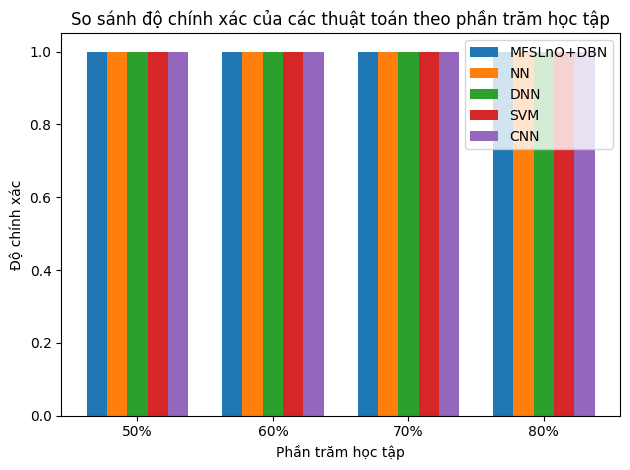

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
accuracies = [
    [accuracy_dnn_MFSLnO_3, accuracy_nn_3, accuracy_dnn_3, accuracy_svm_3, accuracy_3],
    [accuracy_dnn_MFSLnO_2, accuracy_nn_2, accuracy_dnn_2, accuracy_svm_2, accuracy_2],
    [accuracy_dnn_MFSLnO_1, accuracy_nn_1, accuracy_dnn_1, accuracy_svm_1, accuracy_1],
    [accuracy_dnn_MFSLnO, accuracy_nn, accuracy_dnn, accuracy_svm, accuracy],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [accuracy[i] for accuracy in accuracies], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('Độ chính xác')
plt.title('So sánh độ chính xác của các thuật toán theo phần trăm học tập')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


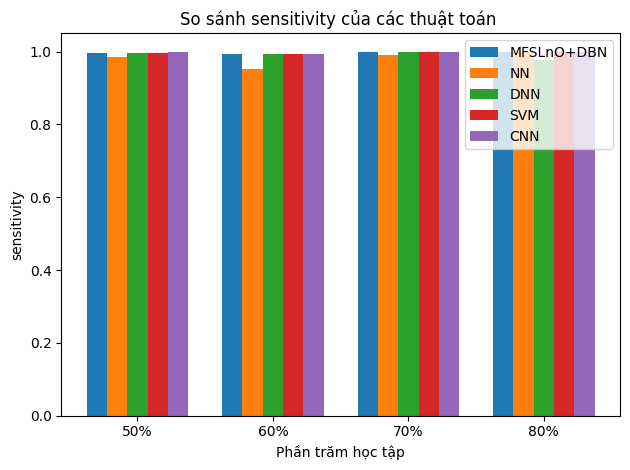

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
sensitivities = [
    [sensitivity_dnn_MFSLnO_3, sensitivity_nn_3, sensitivity_dnn_3, sensitivity_svm_3, sensitivity_3],
    [sensitivity_dnn_MFSLnO_2, sensitivity_nn_2, sensitivity_dnn_2, sensitivity_svm_2, sensitivity_2],
    [sensitivity_dnn_MFSLnO_1, sensitivity_nn_1, sensitivity_dnn_1, sensitivity_svm_1, sensitivity_1],
    [sensitivity_dnn_MFSLnO, sensitivity_nn, sensitivity_dnn, sensitivity_svm, sensitivity],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [sensitivity[i] for sensitivity in sensitivities], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('sensitivity')
plt.title('So sánh sensitivity của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


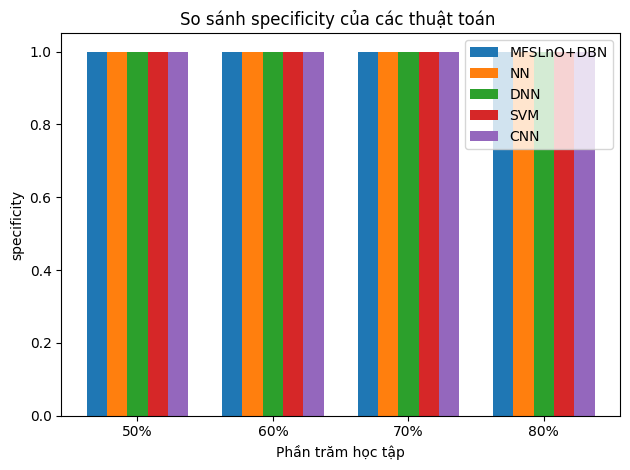

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
specificities = [
    [specificity_dnn_MFSLnO_3, specificity_nn_3, specificity_dnn_3, specificity_svm_3, specificity_3],
    [specificity_dnn_MFSLnO_2, specificity_nn_2, specificity_dnn_2, specificity_svm_2, specificity_2],
    [specificity_dnn_MFSLnO_1, specificity_nn_1, specificity_dnn_1, specificity_svm_1, specificity_1],
    [specificity_dnn_MFSLnO, specificity_nn, specificity_dnn, specificity_svm, specificity],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [specificity[i] for specificity in specificities], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('specificity')
plt.title('So sánh specificity của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


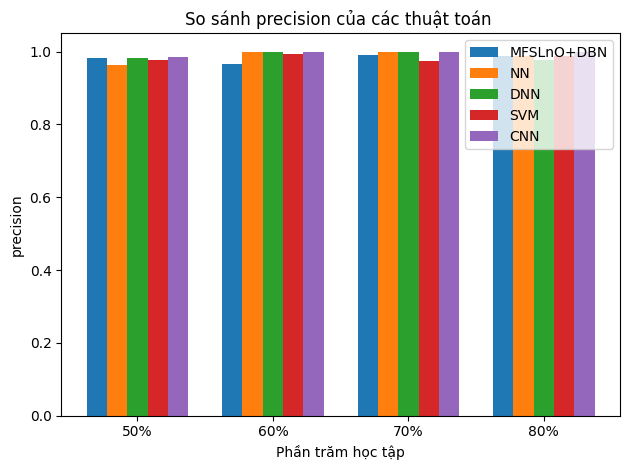

In [65]:


# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
precisiones = [
    [precision_dnn_MFSLnO_3, precision_nn_3, precision_dnn_3, precision_svm_3, precision_3],
    [precision_dnn_MFSLnO_2, precision_nn_2, precision_dnn_2, precision_svm_2, precision_2],
    [precision_dnn_MFSLnO_1, precision_nn_1, precision_dnn_1, precision_svm_1, precision_1],
    [precision_dnn_MFSLnO, precision_nn, precision_dnn, precision_svm, precision],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [precision[i] for precision in precisiones], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('precision')
plt.title('So sánh precision của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


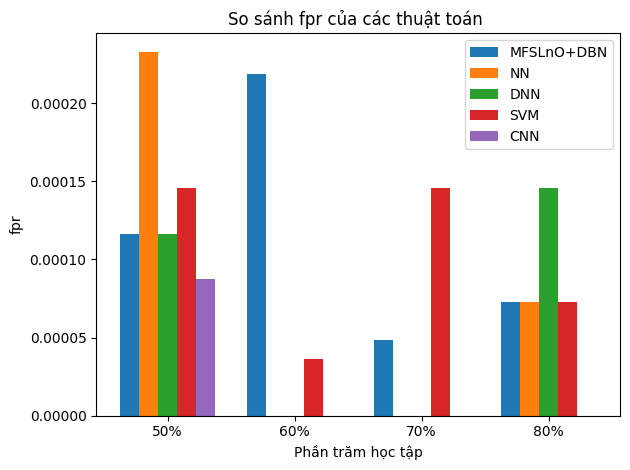

In [66]:


# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
fpres = [
    [fpr_dnn_MFSLnO_3, fpr_nn_3, fpr_dnn_3, fpr_svm_3, fpr_3],
    [fpr_dnn_MFSLnO_2, fpr_nn_2, fpr_dnn_2, fpr_svm_2, fpr_2],
    [fpr_dnn_MFSLnO_1, fpr_nn_1, fpr_dnn_1, fpr_svm_1, fpr_1],
    [fpr_dnn_MFSLnO, fpr_nn, fpr_dnn, fpr_svm, fpr],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [fpr[i] for fpr in fpres], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('fpr')
plt.title('So sánh fpr của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


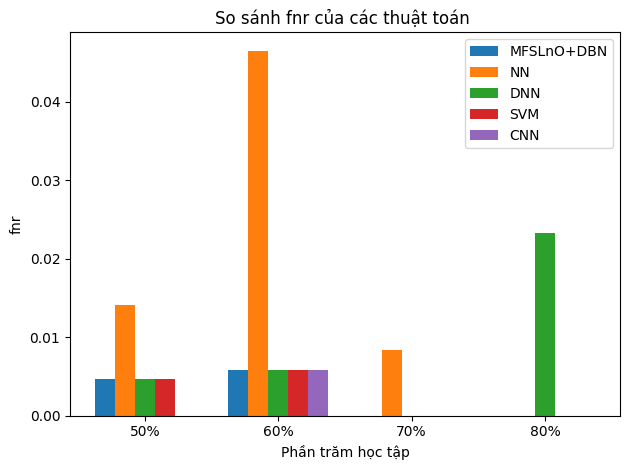

In [67]:


# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
fnres = [
    [fnr_dnn_MFSLnO_3, fnr_nn_3, fnr_dnn_3, fnr_svm_3, fnr_3],
    [fnr_dnn_MFSLnO_2, fnr_nn_2, fnr_dnn_2, fnr_svm_2, fnr_2],
    [fnr_dnn_MFSLnO_1, fnr_nn_1, fnr_dnn_1, fnr_svm_1, fnr_1],
    [fnr_dnn_MFSLnO, fnr_nn, fnr_dnn, fnr_svm, fnr],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [fnr[i] for fnr in fnres], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('fnr')
plt.title('So sánh fnr của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


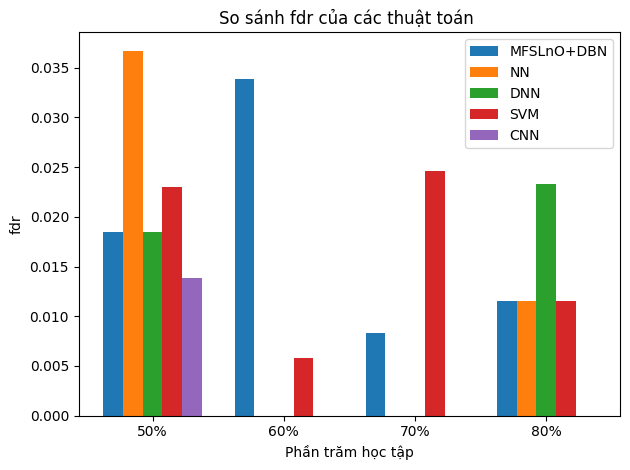

In [68]:


# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
fdres = [
    [fdr_dnn_MFSLnO_3, fdr_nn_3, fdr_dnn_3, fdr_svm_3, fdr_3],
    [fdr_dnn_MFSLnO_2, fdr_nn_2, fdr_dnn_2, fdr_svm_2, fdr_2],
    [fdr_dnn_MFSLnO_1, fdr_nn_1, fdr_dnn_1, fdr_svm_1, fdr_1],
    [fdr_dnn_MFSLnO, fdr_nn, fdr_dnn, fdr_svm, fdr],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [fdr[i] for fdr in fdres], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('fdr')
plt.title('So sánh fdr của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


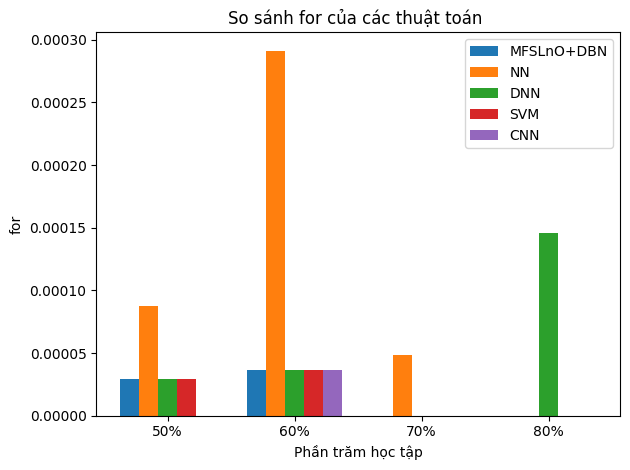

In [69]:


# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
fores = [
    [for_dnn_MFSLnO_3, for_nn_3, for_dnn_3, for_svm_3, for_3],
    [for_dnn_MFSLnO_2, for_nn_2, for_dnn_2, for_svm_2, for_2],
    [for_dnn_MFSLnO_1, for_nn_1, for_dnn_1, for_svm_1, for_1],
    [for_dnn_MFSLnO, for_nn, for_dnn, for_svm, for_],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [for1[i] for for1 in fores], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('for')
plt.title('So sánh for của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()
